In [39]:
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
    

class Seq:
    def __init__(self,x,n=1):
        self.jx=x
        self.x=np.repeat(x,n)
        self.n=n
        self.set_x=set(self.x)
        pass

    
    def chosen_mean(self, x=None):
            
        return sum([x[i] for i in range(len(x))])/len(x)

    def chosen_var(self,x=None):
        x_mean=self.chosen_mean(x)
        return sum([x[i]**2-x_mean**2 for i in range(len(x))])/len(x)
    
    def fix_chosen_var(self,x=None): 
        return len(x)*self.chosen_var(x)/(len(x)-1)
    
    def chosen_first_m(self,x=None,k=3):
        return sum([x[i]**k for i in range(len(x))])/len(x)
    
    def fix_chosen_first_m(self,x=None,k=3):
        return sum([x[i]**k for i in range(len(x))])/len(x) * (len(x)**(k))/reduce(lambda x,y : x*y, [(len(x)-i) for i in range(k)])
    
    def plot(self,x=None,n=1):
        plt.step(x,n)
        plt.grid()
        plt.show
    
    def find_func(self,x=None,pprint=False):
        func_dict=dict()
        for t in x:
            func_dict[t] = len(x[x<t])/len(x)
        if pprint:
            text=''
            for i in range(len(list(func_dict.keys()))):
                if i == 0:
                    text+=f'\n{list(func_dict.values())[i]:<{len(max([str(i) for i in list(func_dict.values())],key=len))}} при {" "*len(max([str(i) for i in list(func_dict.keys())],key=len))}   x <= {list(func_dict.keys())[i]:<{len(max([str(i) for i in list(func_dict.keys())],key=len))}}'
                    
                else:
                    text+=f'\n{list(func_dict.values())[i]:<{len(max([str(i) for i in list(func_dict.values())],key=len))}} при {list(func_dict.keys())[i-1]:<{len(max([str(i) for i in list(func_dict.keys())],key=len))}} < x <= {list(func_dict.keys())[i]:<{len(max([str(i) for i in list(func_dict.keys())],key=len))}}'
            text+=f'\n{"1":<{len(max([str(i) for i in list(func_dict.values())],key=len))}} при {" "*len(max([str(i) for i in list(func_dict.keys())],key=len))}   x >  {list(func_dict.keys())[i]:<{len(max([str(i) for i in list(func_dict.keys())],key=len))}}'
                    
            print(text)
        else:
            return func_dict
    
    def get_emperic_value(self,x,t):
        func = self.find_func(x)
        
        keys = list(func.keys())
        if t<=min(keys):
            return 0
        elif t>max(keys):
            return 1
        else:
            for i in range(1,len(keys)):
                if keys[i-1]>t and t<=keys[i]:
                    return func[keys[i]]
    def plot(self,x):
        bin_dt, bin_gr = np.histogram(x, bins=len(x))
        Y = bin_dt.cumsum()
        for i in range(len(Y)):
            plt.plot([bin_gr[i], bin_gr[i+1]],[Y[i], Y[i]],color='magenta')
        plt.show()
    
    def freq_polygon(self,x,n):
        plt.plot(x,n,'bo-')
        plt.grid()
        plt.show()
        
    
    def do_all_func(self,k=2):
        x=self.x
        print(f'''Выборочное среднее = {self.chosen_mean(x)}
              
Выборочная дисперсия = {self.chosen_var(x)}

Исправленная дисперсия = {self.fix_chosen_var(x)}

Выборочный момент порядка {k} = {self.chosen_first_m(x,k=k)}

Исправленный выборочный момент порядка {k} = {self.fix_chosen_first_m(x,k=k)}

Эмпирическая Функция:''')
        self.find_func(x,True)
        self.plot(x)
        

# 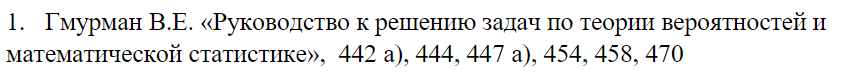

## 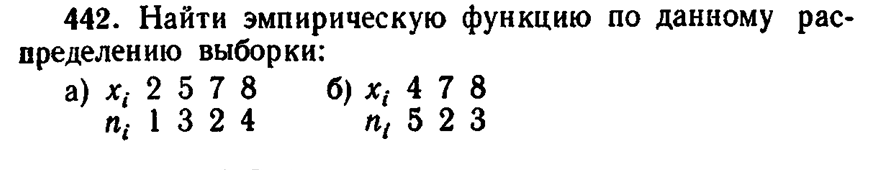

In [40]:
seq = Seq([2,5,7,8],[1,3,2,4])

seq.find_func(seq.x, True)


0.0 при     x <= 2
0.1 при 2 < x <= 5
0.4 при 5 < x <= 7
0.6 при 7 < x <= 8
1   при     x >  8


## 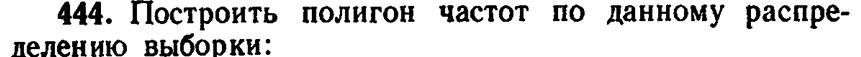

### 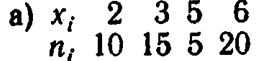

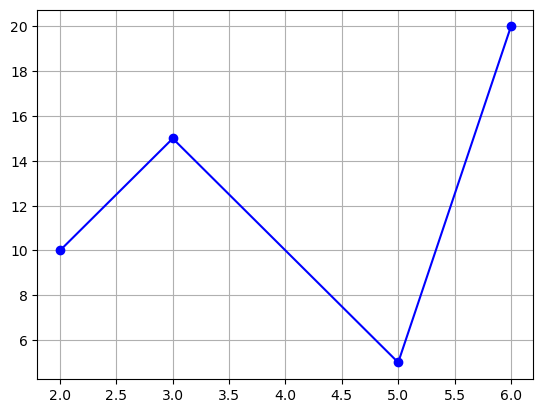

In [41]:
seq = Seq([2,3,5,6],[10,15,5,20])

seq.freq_polygon(seq.jx,seq.n)

### 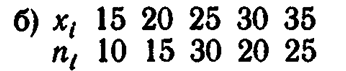

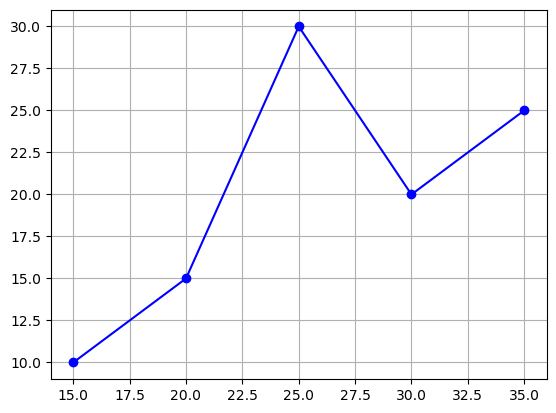

In [42]:
seq = Seq([15,20,25,30,35],[10,15,30,20,25])

seq.freq_polygon(seq.jx,seq.n)

## 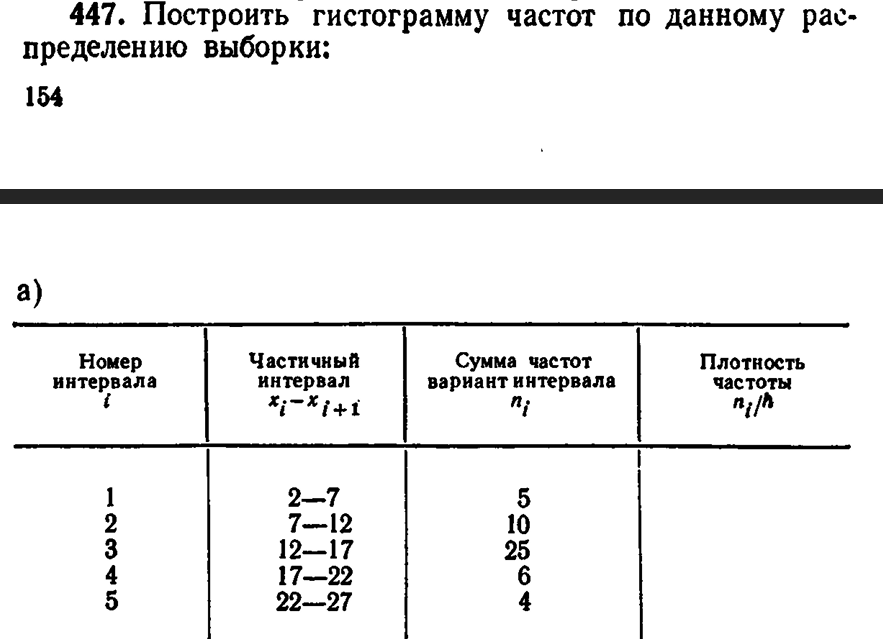

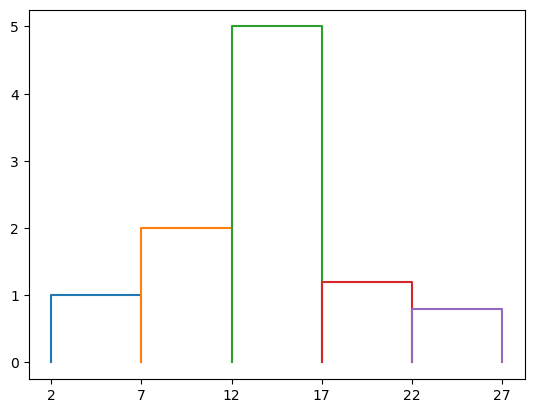

In [43]:
x = [2,7,12,17,22,27]
ni = [5,10,25,6,4]
for i in range(len(x)-1):
    x_t,x_next=x[i],x[i+1]
    plt.plot([x_t,x_t,x_next,x_next],[0,ni[i]/abs(x_t-x_next),ni[i]/abs(x_t-x_next),0])
plt.xticks(x)
plt.show()

## 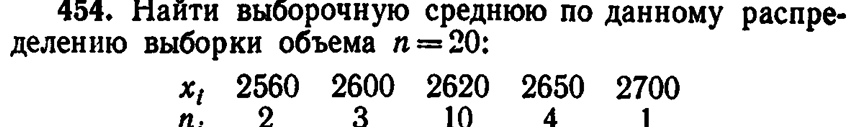

In [44]:
seq = Seq([2560,2600,2620,2650,2700],[2,3,10,4,1])

seq.chosen_mean(seq.x)

2621.0

## 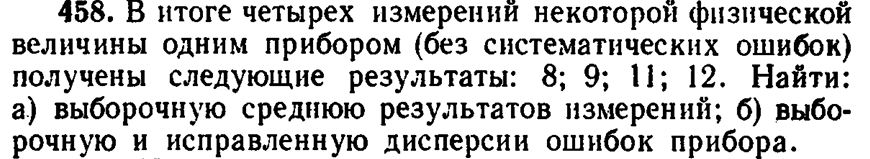

Выборочное среднее = 10.0
              
Выборочная дисперсия = 2.5

Исправленная дисперсия = 3.3333333333333335

Выборочный момент порядка 2 = 102.5

Исправленный выборочный момент порядка 2 = 136.66666666666666

Эмпирическая Функция:

0.0  при      x <= 8 
0.25 при 8  < x <= 9 
0.5  при 9  < x <= 11
0.75 при 11 < x <= 12
1    при      x >  12


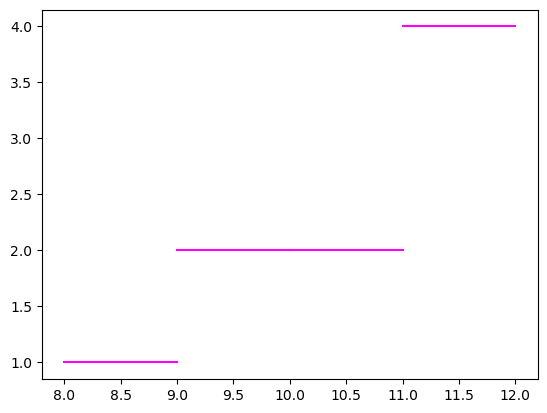

In [45]:
seq = Seq([8,9,11,12])

seq.do_all_func()

## 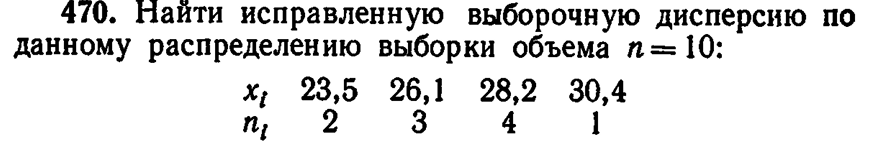

In [46]:
seq = Seq([23.5,26.1,28.2,30.4],[2,3,4,1])

seq.fix_chosen_var(seq.x)

4.891666666667043

# 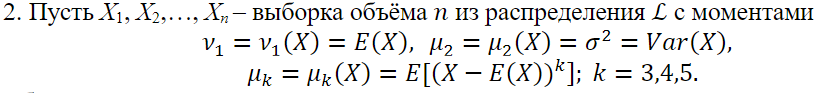